**0. Import the data and declare your package dependencies.**

In [1]:
#libraries
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, labs, geom_col, geom_point, geom_density, coord_flip, theme_minimal, geom_boxplot


In [2]:
#data
avocado = pd.read_csv('data/avocado-updated-2020.csv')

**1. Briefly describe the data set. What information does it contain?**

In [3]:
# "The dataset features historical data on avocado prices and sales volume in multiple cities, states, and regions of the USA" 
# "Contains data from 4 January 2015 up to 17 May 2020"
# - Kaggle

**2. Clean the data in any way you see fit.**

In [4]:
#data manipulation
#long_avocado = avocado.melt(id_vars=["total_volume"], value_vars=["small_bags", "large_bags", "xlarge_bags"], 
                            #var_name="bag_type", value_name="bag_volume")


avocado_clean = avocado

# converts the string to date format
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

#converts string variables to categorical type
#avocado_clean['geography'] = avocado_clean['geography'].astype('category')
avocado_clean['type'] = avocado_clean['type'].astype('category')

#split date to 3 variables
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day


**Exercises**

**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**


In [5]:
#select only the organic observations in the year 2017
organic = avocado_clean[(avocado["type"] == "organic") & (avocado_clean["year"] == 2017)]

#stores small_bags grouped by geography. gets the max and then sorts
#refrenced chat GPT
organic.groupby("geography")["small_bags"].max().sort_values(ascending=False)

geography
Total U.S.              771846.48
Northeast               238752.11
West                    160414.47
South Central           145920.93
Great Lakes             140923.52
Midsouth                131997.28
California              102260.68
Denver                   91421.75
Los Angeles              87365.60
Southeast                69576.29
New York                 60473.16
Baltimore/Washington     57494.13
Houston                  48107.57
Boston                   36442.28
Plains                   34485.91
Northern New England     32627.56
Dallas/Ft. Worth         31403.21
Philadelphia             30809.89
Detroit                  27997.42
Harrisburg/Scranton      25562.80
West Tex/New Mexico      25191.62
Seattle                  22511.93
Chicago                  22340.77
Hartford/Springfield     18475.42
Raleigh/Greensboro       15201.69
Buffalo/Rochester        14993.82
Pittsburgh               14761.11
Las Vegas                14188.24
Richmond/Norfolk         13577.23
Colu

the northeast region is the most at 238752.11 small bags

**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [6]:
#split the variables in the data cleaning step

#stores total_volume grouped by month. gets the max and then sorts
avocado_clean.groupby("month")["total_volume"].mean().sort_values(ascending=False)

month
5     1.123632e+06
2     1.095374e+06
6     1.051247e+06
4     1.016582e+06
3     9.957150e+05
1     9.853122e+05
7     9.832681e+05
8     9.499249e+05
9     9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

month 5 is the highest average volume of avocado sales (1.123632e+06)

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

In [22]:
#stores total_volume grouped by geography. gets the max and then sorts
avocado_clean.groupby("geography")["total_volume"].sum().sort_values(ascending=False)

#Los Angeles sold the most total avocados (5660216.21)

geography
Total U.S.              1.209377e+10
West                    2.150049e+09
South Central           2.075908e+09
California              1.991888e+09
Northeast               1.541420e+09
Southeast               1.381324e+09
Great Lakes             1.220448e+09
Midsouth                1.097477e+09
Los Angeles             9.593505e+08
Plains                  6.352576e+08
New York                5.282452e+08
Dallas/Ft. Worth        4.362042e+08
Houston                 4.208438e+08
Phoenix/Tucson          3.825234e+08
West Tex/New Mexico     2.806116e+08
Denver                  2.779295e+08
Baltimore/Washington    2.767646e+08
San Francisco           2.742169e+08
Chicago                 2.576650e+08
Miami/Ft. Lauderdale    2.317448e+08
Portland                2.135438e+08
Boston                  2.041325e+08
Seattle                 2.024026e+08
Atlanta                 1.989941e+08
San Diego               1.737644e+08
Philadelphia            1.584327e+08
Northern New England    1.56

Los Angeles sold the most total avocados (9.593505e+08 avocados)

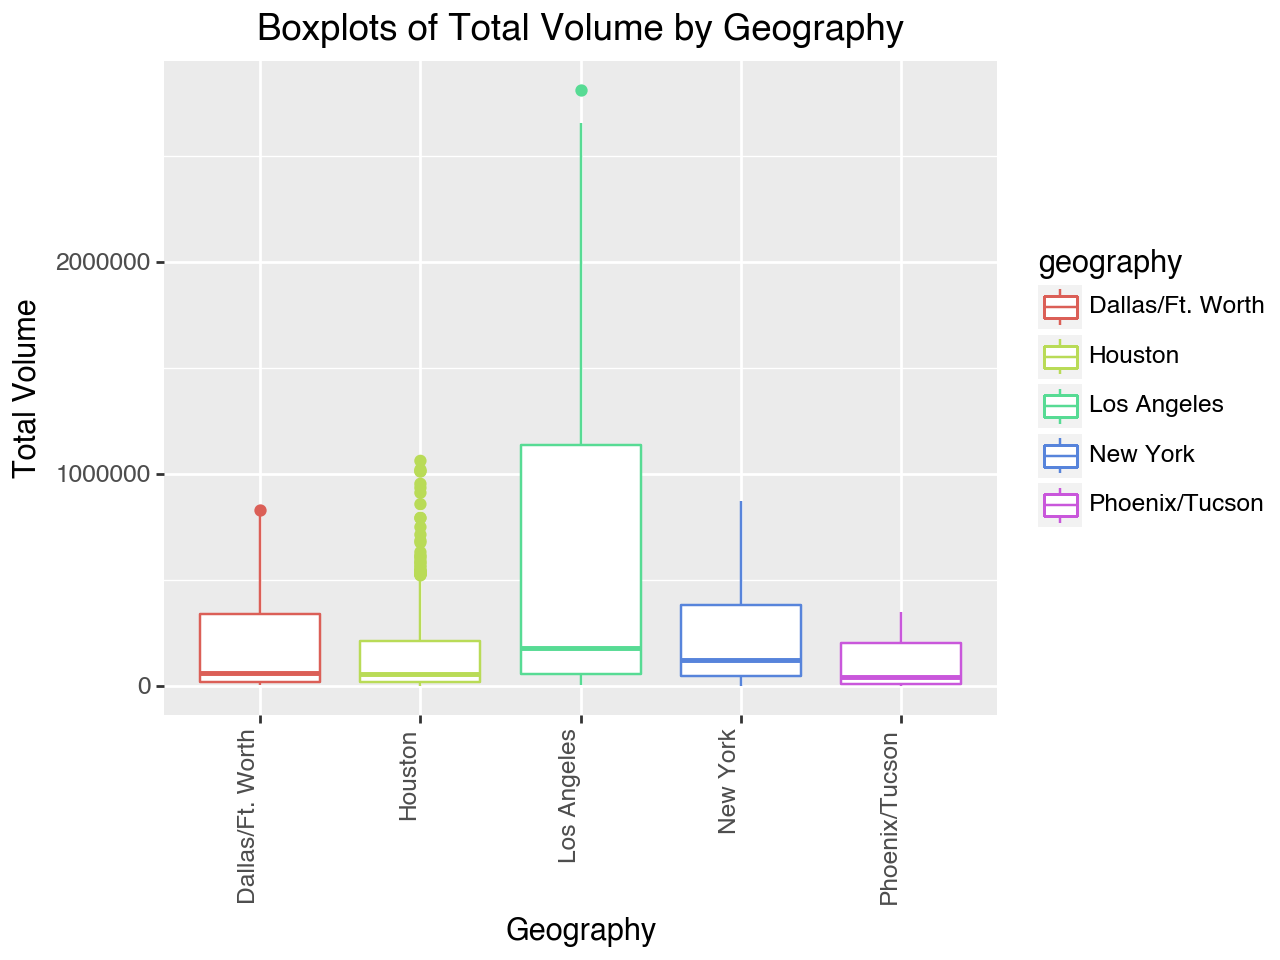

In [8]:
#top 5 metro geographical regions:
# los angeles
# new york
# houston
# pheonix 
# dallas
#filter data to only include those 5 regions
top_5 = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "New York") | (avocado_clean["geography"] == "Houston") | (avocado_clean["geography"] == "Phoenix/Tucson") | (avocado_clean["geography"] == "Dallas/Ft. Worth")]

#side-by-side box plot
(ggplot(top_5, aes(x='geography', y='small_bags', color = 'geography'))
    + geom_boxplot()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplots of Total Volume by Geography', x='Geography', y='Total Volume')
)

**Pivoting**

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

In [9]:
california = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "San Diego") | (avocado_clean["geography"] == "Sacramento") | (avocado_clean["geography"] == "San Francisco")]


**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

In [10]:
#doesnt work anymore!

#see which region the price of organic versus conventional is most different
california.groupby(["type", "geography"])["average_price"].mean().sort_values(ascending=False)


<positron-console-cell-10>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


type          geography    
organic       San Francisco    2.119444
              Sacramento       1.873856
              San Diego        1.798366
              Los Angeles      1.574902
conventional  San Francisco    1.400490
              Sacramento       1.295359
              San Diego        1.113856
              Los Angeles      1.047124
Name: average_price, dtype: float64

average price difference between organic and convertional per region:

- san francisco: $.527 more for organic
- sacramento: $0.578 more for organic
- san diego: $0.684 more for organic
- los angeles: $0.718 more for organic

So los angeles has the biggest difference between the price of organic versus conventional avocados

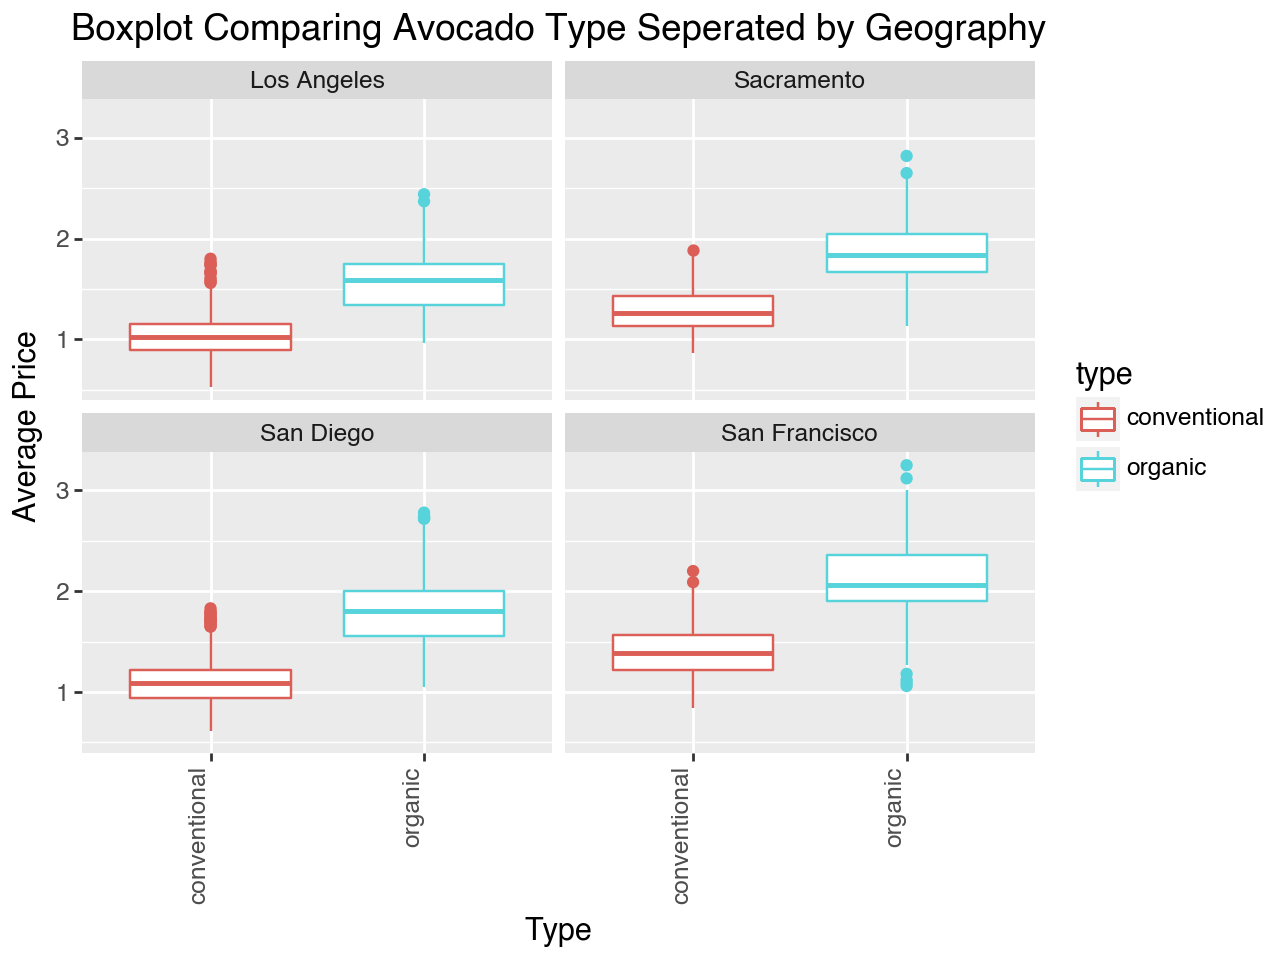

In [11]:
#boxplot using facet_wrap for region
(ggplot(california, aes(x='type', y='average_price', color = 'type'))
    + geom_boxplot()
    + facet_wrap('geography')
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplot Comparing Avocado Type Seperated by Geography', x='Type', y='Average Price')
)

**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

![image info](plots/plot1.png)

In [12]:
#pivot data so that it shows value and then type?
long_california = california.melt(id_vars=["date", "average_price", "4046", "total_volume", "geography", "type"], value_vars=["small_bags", "large_bags", "xlarge_bags"], 
                            var_name="size", value_name="bag_value")


#changes all the variables below to categorical variable type.
long_california.loc[long_california['size'] == 'small_bags', 'size'] = 'Small'
long_california.loc[long_california['size'] == 'large_bags', 'size'] = 'Large'
long_california.loc[long_california['size'] == 'xlarge_bags', 'size'] = 'Xlarge'


long_california['size'] = pd.Categorical(long_california['size'], categories=['Xlarge', 'Large', 'Small'], ordered=True)

#long_california['size'] = long_california['size'].astype('category')

In [13]:
#plot design:

#plot type = barplot
#x = region
#y = proportion by average hass avocado sales
#facet_wrap = avocado type


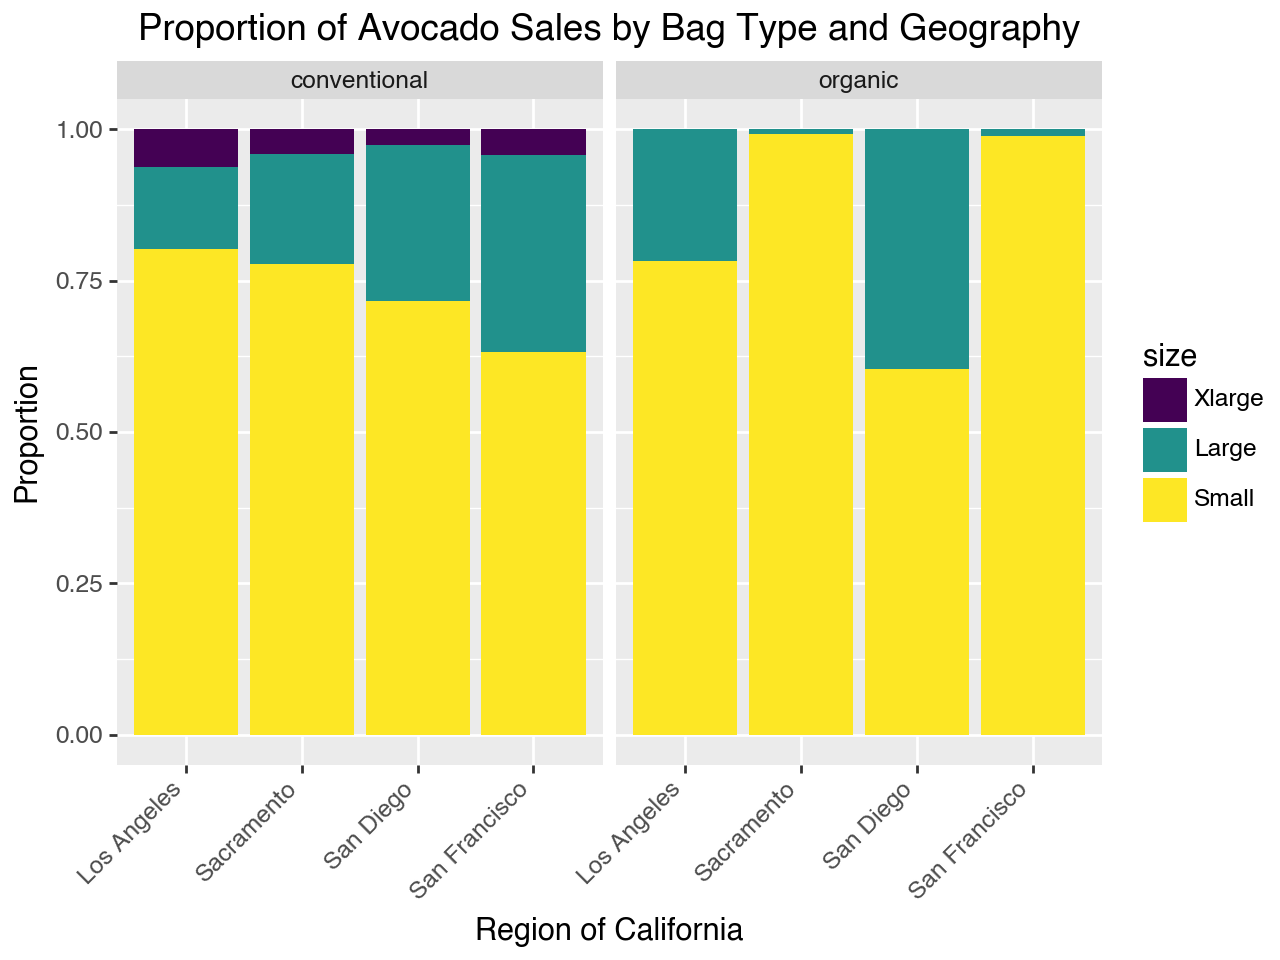

In [14]:
(ggplot(long_california, aes(x='geography', y='bag_value', fill='size'))
    + geom_col(position='fill')  # Use 'fill' to show proportions
    + facet_wrap('type')
    + theme(axis_text_x=element_text(angle=45, hjust=1))  # Adjust the angle for better readability
    + labs(title='Proportion of Avocado Sales by Bag Type and Geography', x='Region of California', y='Proportion')
)


**Using Outside Data**

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [15]:

#dataframe of california housing using CHAT GPT
california_housing = pd.DataFrame({
    'geography': ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco'],
    'average_house_price': [900000, 800000, 450000, 1500000],
    'median_house_price': [750000, 700000, 400000, 1350000],
    'price_per_sqft': [700, 650, 300, 1000],
    'housing_sales_volume': [20000, 15000, 10000, 12000]
})


In [16]:
#join long_california and california_housing datasets
california_combined = pd.merge(california_housing, long_california, on='geography')

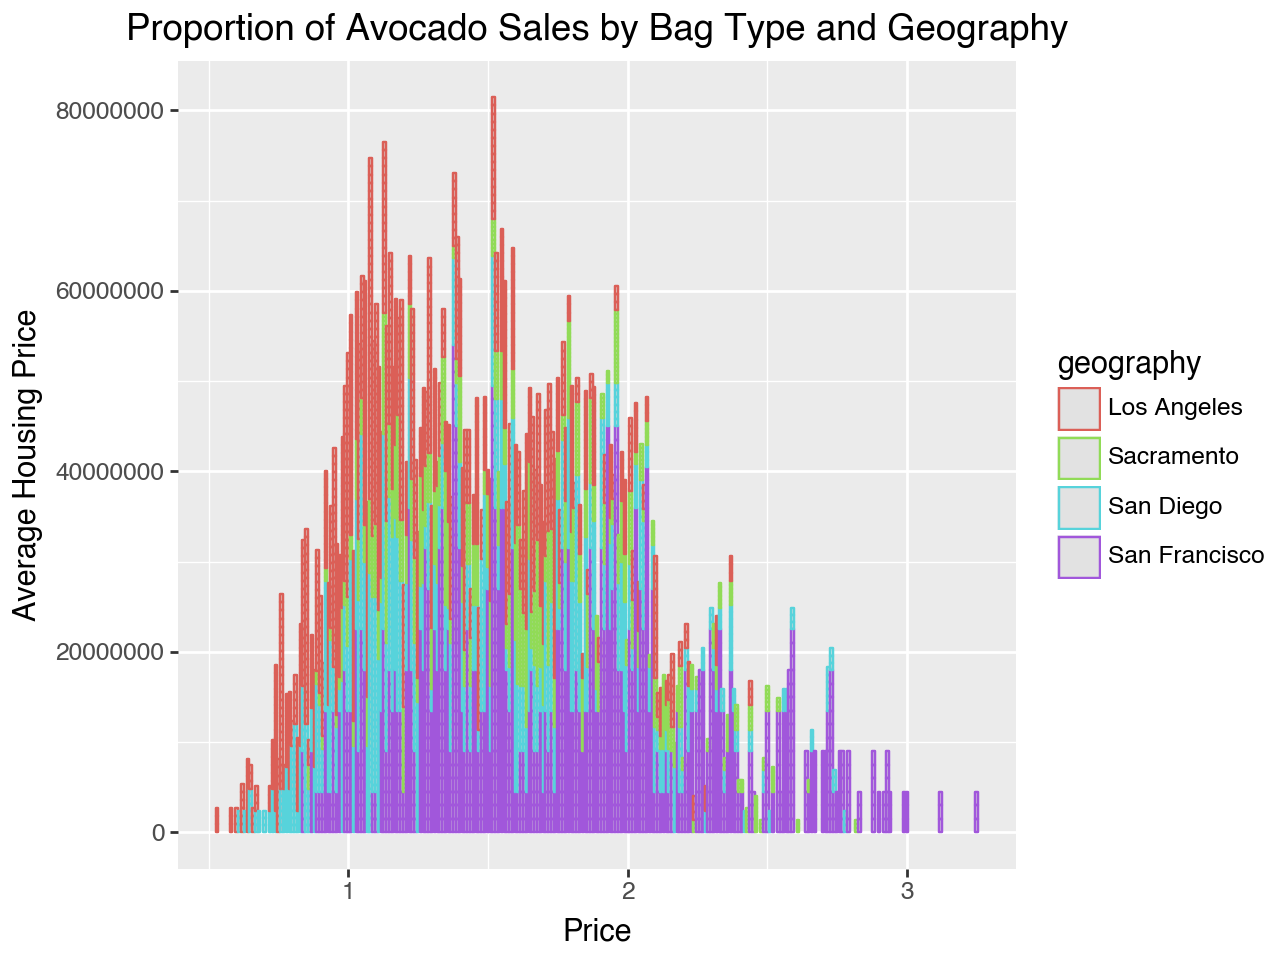

In [17]:
(ggplot(california_combined, aes(x='average_price', y='average_house_price', color = 'geography'))
    + geom_col(alpha = .1)  # Use 'fill' to show proportions
    #+ facet_wrap('geography')
    #+ theme(axis_text_x=element_text(angle=45, hjust=1))  # Adjust the angle for better readability
    + labs(title='Proportion of Avocado Sales by Bag Type and Geography', x='Price', y='Average Housing Price')
)

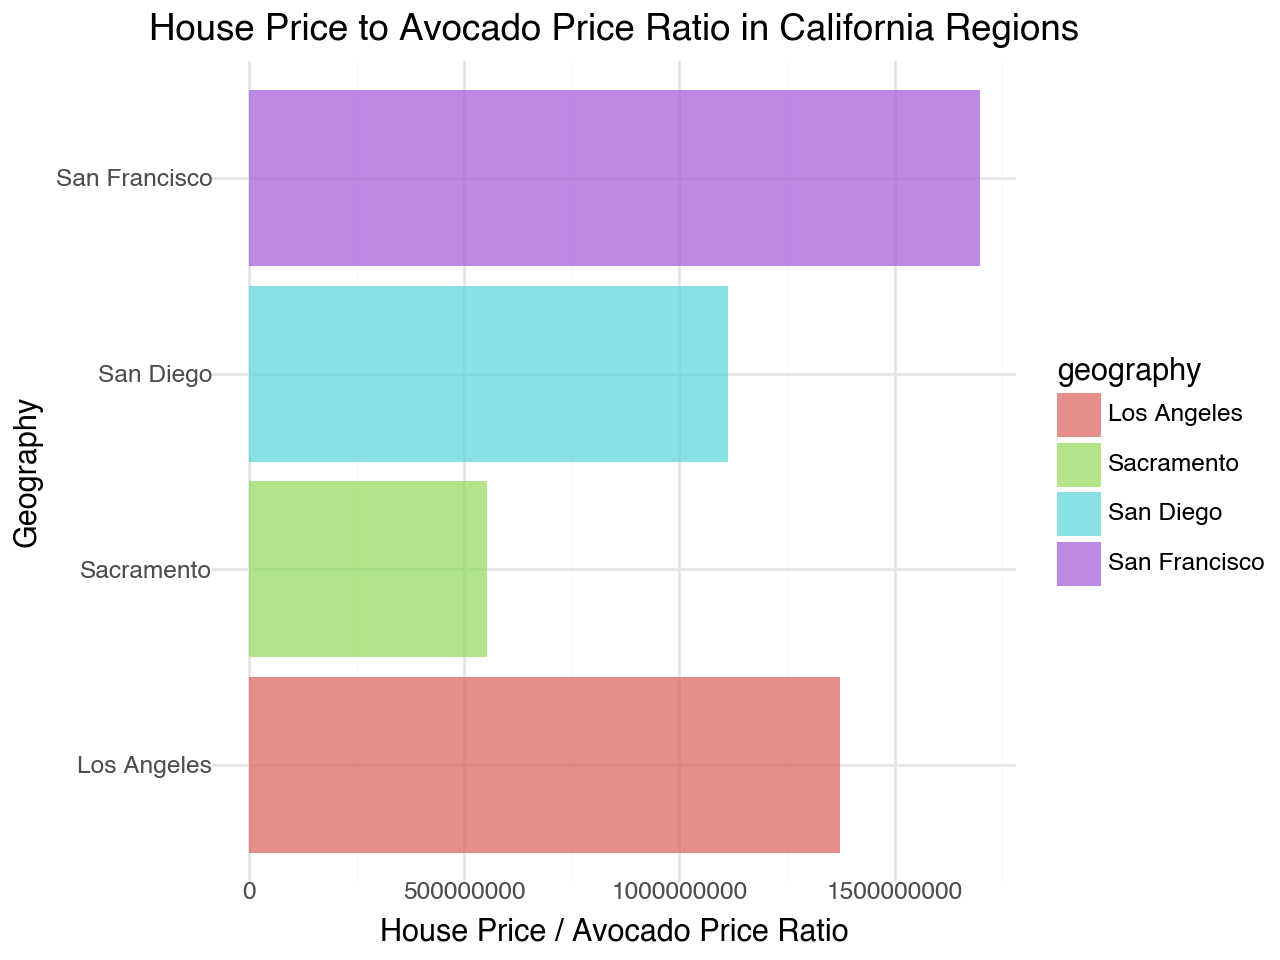

In [18]:
# price ratio to show change in average_house_price based on the avocado price
california_combined['price_ratio'] = california_combined['average_house_price'] / california_combined['average_price']

#bar plot
#x/fill = geography
#y = price ratio
(ggplot(california_combined, aes(x='geography', y='price_ratio', fill='geography'))
        + geom_bar(stat='identity', alpha=0.7)
        #rotates bars
        + coord_flip()
        #titles
        + labs(title='House Price to Avocado Price Ratio in California Regions',
               x='Geography',
               y='House Price / Avocado Price Ratio')
        + theme_minimal()
       )

- This bar chart visualizes the ratio of house prices to avocado prices for each region.
- A higher bar indicates a greater disparity between house and avocado prices. (This would means that avacodo prices has a negative correlation with housing prices.)
- As avocado prices go up, the housing market goes down. 
- So people really are spending all their money on avocado toast.